In [1]:
# 调用包
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import KNNImputer

In [2]:
#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)

# 数据处理

## 标准化

In [3]:
#读取数据
data = 'D:\数据分析文档\荣昌母猪\荣昌母猪妊娠后期.xlsx'
df = pd.read_excel(data,header=None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.597701,0.625668,0.577465,0.379310,0.393939,0.555556,0.592593,0.25,0.668186,0.580445,0.500000,0.545455,0.583333
1,0.666667,0.631016,0.422535,0.551724,0.424242,0.111111,0.555556,0.25,0.705561,0.499827,0.750000,0.727273,0.666667
2,0.551724,0.486631,0.323944,0.482759,0.424242,0.333333,0.481481,0.50,0.391978,0.569619,0.583333,0.545455,0.583333
3,0.655172,0.631016,0.450704,0.517241,0.393939,0.111111,0.370370,0.50,0.574294,0.680755,0.416667,0.454545,0.583333
4,0.931034,0.855615,0.366197,1.000000,1.000000,0.777778,0.962963,0.25,0.429353,0.103190,0.333333,0.363636,0.250000
5,0.413793,0.299465,0.169014,0.379310,0.454545,0.777778,0.370370,0.00,0.489517,0.580790,0.416667,0.454545,0.583333
6,0.436782,0.342246,0.225352,0.275862,0.333333,0.666667,0.444444,0.50,0.513218,0.171830,0.583333,0.545455,0.250000
7,0.344828,0.395722,0.591549,0.448276,0.484848,0.666667,0.444444,0.25,0.314494,0.262697,0.333333,0.363636,0.250000
8,0.701149,0.652406,0.394366,0.758621,0.636364,0.222222,0.740741,0.50,0.268004,0.330761,0.416667,0.363636,0.416667
9,0.563218,0.545455,0.450704,0.448276,0.454545,0.555556,0.592593,0.50,0.267092,0.399631,0.083333,0.090909,0.250000


## 填补缺失值

In [5]:
#使用KNN算法填补缺失值
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df))
#保存填补缺失值后的数据
df.to_excel('excel8.xlsx',sheet_name='sheet1',index=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.597701,0.625668,0.577465,0.379310,0.393939,0.555556,0.592593,0.25,0.668186,0.580445,0.500000,0.545455,0.583333
1,0.666667,0.631016,0.422535,0.551724,0.424242,0.111111,0.555556,0.25,0.705561,0.499827,0.750000,0.727273,0.666667
2,0.551724,0.486631,0.323944,0.482759,0.424242,0.333333,0.481481,0.50,0.391978,0.569619,0.583333,0.545455,0.583333
3,0.655172,0.631016,0.450704,0.517241,0.393939,0.111111,0.370370,0.50,0.574294,0.680755,0.416667,0.454545,0.583333
4,0.931034,0.855615,0.366197,1.000000,1.000000,0.777778,0.962963,0.25,0.429353,0.103190,0.333333,0.363636,0.250000
5,0.413793,0.299465,0.169014,0.379310,0.454545,0.777778,0.370370,0.00,0.489517,0.580790,0.416667,0.454545,0.583333
6,0.436782,0.342246,0.225352,0.275862,0.333333,0.666667,0.444444,0.50,0.513218,0.171830,0.583333,0.545455,0.250000
7,0.344828,0.395722,0.591549,0.448276,0.484848,0.666667,0.444444,0.25,0.314494,0.262697,0.333333,0.363636,0.250000
8,0.701149,0.652406,0.394366,0.758621,0.636364,0.222222,0.740741,0.50,0.268004,0.330761,0.416667,0.363636,0.416667
9,0.563218,0.545455,0.450704,0.448276,0.454545,0.555556,0.592593,0.50,0.267092,0.399631,0.083333,0.090909,0.250000


In [6]:
#读取数据
data = 'D:\数据分析文档\荣昌母猪\荣昌母猪妊娠后期缺失值填补.xlsx'
df = pd.read_excel(data)

In [7]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,84d初重,110d末重,日增重,84d背膘厚,110d背膘厚,背膘增长,母猪28d背膘,发情间隔,仔猪初生窝重,仔猪断奶窝重,总产仔数,产活仔猪,断奶仔猪数
0,1组,NaN,1-1,141,161.0,0.769231,37,38,1,37.0,5,9.50,66.170,9,9,9.0
1,NaN,NE：8.75MJ/kg,1-2,152,168.5,0.634615,43,44,1,41.0,6,9.58,42.650,10,9,9.0
2,NaN,SIDLys：0.52%,1-3,187,200.0,0.500000,48,48,0,49.0,6,12.28,7.090,12,12,2.0
3,NaN,NaN,1-4,172,188.0,0.615385,43,45,2,40.0,6,11.52,54.050,13,13,10.0
4,NaN,NaN,1-5,148,166.0,0.692308,45,47,2,38.0,7,8.16,54.510,8,8,5.0
5,NaN,NaN,1-6,130,146.0,0.615385,31,33,2,29.0,5,9.66,51.860,10,10,8.0
6,NaN,NaN,1-7,129,136.5,0.288462,38,40,2,43.0,4,5.68,27.100,7,7,6.0
7,NaN,NaN,1-8,127,143.5,0.634615,38,42,4,39.0,6,4.08,21.450,4,4,4.0
8,2组,NaN,2-1,148,168.5,0.788462,38,47,9,42.0,5,13.97,22.460,14,14,5.0
9,NaN,NE：8.75MJ/kg,2-2,150,161.5,0.442308,27,28,1,22.0,5,12.46,76.420,11,11,11.0


In [8]:
#将数据处理为符合模型输入的格式
df.rename(columns={'Unnamed: 0':'NE',
                    'Unnamed: 1':'SID_Lys',
                    'Unnamed: 2':'编号',
                    '84d初重':'84 d weight',
                    '110d末重':'110 d weight',
                    '日增重':'ADG',
                    '84d背膘厚':'84 d backfat',
                    '110d背膘厚':'110 d backfat',
                    '背膘增长':'Backfat increase',
                    '母猪28d背膘':'Weaning backfat',
                    '发情间隔':'Weaning to estrus interval',
                    '仔猪初生窝重':'Piglet weight at birth',
                    '仔猪断奶窝重':'Piglet weight at weaning',
                    '总产仔数':'Total litter size',
                    '产活仔猪':'Live litter size',
                    '断奶仔猪数':'Weaning litter size'
                    },inplace=True)

NE = [1]*24 + [2]*24 + [3]*25
SID_Lys = [1]*8 + [2]*8 + [3]*8

df['NE'] = NE
df['SID_Lys'] = SID_Lys*2 + [1]*8 + [2]*8 + [3]*9

In [9]:
df

,NE,SID_Lys,编号,84 d weight,110 d weight,ADG,84 d backfat,110 d backfat,Backfat increase,Weaning backfat,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Total litter size,Live litter size,Weaning litter size
0,1,1,1-1,141,161.0,0.769231,37,38,1,37.0,5,9.50,66.170,9,9,9.0
1,1,1,1-2,152,168.5,0.634615,43,44,1,41.0,6,9.58,42.650,10,9,9.0
2,1,1,1-3,187,200.0,0.500000,48,48,0,49.0,6,12.28,7.090,12,12,2.0
3,1,1,1-4,172,188.0,0.615385,43,45,2,40.0,6,11.52,54.050,13,13,10.0
4,1,1,1-5,148,166.0,0.692308,45,47,2,38.0,7,8.16,54.510,8,8,5.0
5,1,1,1-6,130,146.0,0.615385,31,33,2,29.0,5,9.66,51.860,10,10,8.0
6,1,1,1-7,129,136.5,0.288462,38,40,2,43.0,4,5.68,27.100,7,7,6.0
7,1,1,1-8,127,143.5,0.634615,38,42,4,39.0,6,4.08,21.450,4,4,4.0
8,1,2,2-1,148,168.5,0.788462,38,47,9,42.0,5,13.97,22.460,14,14,5.0
9,1,2,2-2,150,161.5,0.442308,27,28,1,22.0,5,12.46,76.420,11,11,11.0


In [10]:
#提取列名
columns = df.columns.tolist()
del columns[0:3]

In [11]:
#查看列名
print(columns)

['84 d weight', '110 d weight', 'ADG', '84 d backfat', '110 d backfat', 'Backfat increase', 'Weaning backfat', 'Weaning to estrus interval', 'Piglet weight at birth', 'Piglet weight at weaning', 'Total litter size', 'Live litter size', 'Weaning litter size']


In [13]:
#提取各指标数据
df_x = df[columns]

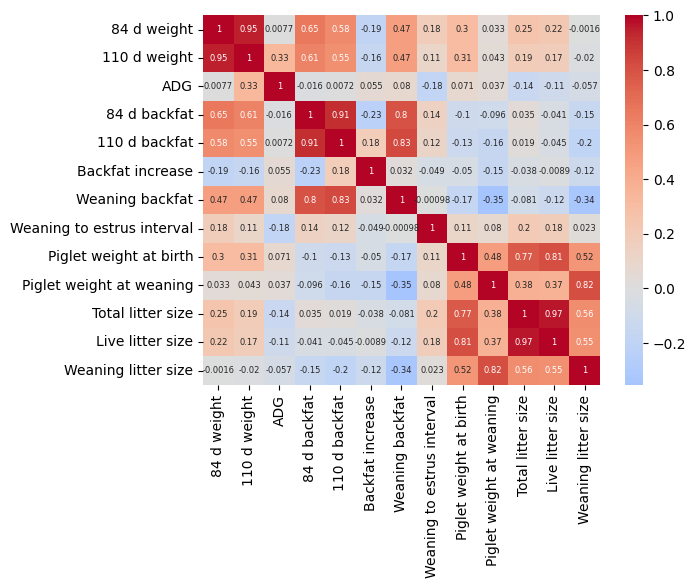

In [14]:
#查看各个指标之间的相关性
df_corr_x = df_x.corr()
sns.heatmap(df_corr_x, annot=True, cmap='coolwarm',center=0,annot_kws={"fontsize":6})
fig=plt.gcf()
plt.show()

In [15]:
#筛选指标
effect_list = ['NE',
                 'SID_Lys',
                 '编号',
                 'ADG',
                 'Backfat increase',
                 'Weaning to estrus interval',
                 'Piglet weight at birth',
                 'Piglet weight at weaning',
                 'Live litter size',
                 'Weaning litter size']

In [16]:
df_effect = df[effect_list]

In [17]:
df_effect

,NE,SID_Lys,编号,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,1,1,1-1,0.769231,1,5,9.50,66.170,9,9.0
1,1,1,1-2,0.634615,1,6,9.58,42.650,9,9.0
2,1,1,1-3,0.500000,0,6,12.28,7.090,12,2.0
3,1,1,1-4,0.615385,2,6,11.52,54.050,13,10.0
4,1,1,1-5,0.692308,2,7,8.16,54.510,8,5.0
5,1,1,1-6,0.615385,2,5,9.66,51.860,10,8.0
6,1,1,1-7,0.288462,2,4,5.68,27.100,7,6.0
7,1,1,1-8,0.634615,4,6,4.08,21.450,4,4.0
8,1,2,2-1,0.788462,9,5,13.97,22.460,14,5.0
9,1,2,2-2,0.442308,1,5,12.46,76.420,11,11.0


In [18]:
columns_final = df_effect.columns.tolist()
del columns_final[0:3]

In [19]:
x = df[effect_list[3:]]
x

,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,0.769231,1,5,9.50,66.170,9,9.0
1,0.634615,1,6,9.58,42.650,9,9.0
2,0.500000,0,6,12.28,7.090,12,2.0
3,0.615385,2,6,11.52,54.050,13,10.0
4,0.692308,2,7,8.16,54.510,8,5.0
5,0.615385,2,5,9.66,51.860,10,8.0
6,0.288462,2,4,5.68,27.100,7,6.0
7,0.634615,4,6,4.08,21.450,4,4.0
8,0.788462,9,5,13.97,22.460,14,5.0
9,0.442308,1,5,12.46,76.420,11,11.0


## 正向化和标准化——极差法

正向指标越大越好，负向指标越小越好，将负向指标转化为正向指标。除了发情间隔为负向指标外，其它均为正向指标。极差法可以同时进行正向化和标准化

In [20]:
#正向指标
x.loc[:,'ADG'] = (x['ADG'] - x['ADG'].min())/(x['ADG'].max() - x['ADG'].min())
x.loc[:,'Backfat increase'] = (x['Backfat increase'] - x['Backfat increase'].min())/(x['Backfat increase'].max() - x['Backfat increase'].min())
x.loc[:,'Piglet weight at birth'] = (x['Piglet weight at birth'] - x['Piglet weight at birth'].min())/(x['Piglet weight at birth'].max() - x['Piglet weight at birth'].min())
x.loc[:,'Piglet weight at weaning'] = (x['Piglet weight at weaning'] - x['Piglet weight at weaning'].min())/(x['Piglet weight at weaning'].max() - x['Piglet weight at weaning'].min())
x.loc[:,'Live litter size'] = (x['Live litter size'] - x['Live litter size'].min())/(x['Live litter size'].max() - x['Live litter size'].min())
x.loc[:,'Weaning litter size'] = (x['Weaning litter size'] - x['Weaning litter size'].min())/(x['Weaning litter size'].max() - x['Weaning litter size'].min())

In [21]:
#负向指标
x.loc[:,'Weaning to estrus interval'] = (x['Weaning to estrus interval'].max() - x['Weaning to estrus interval'])/(x['Weaning to estrus interval'].max() - x['Weaning to estrus interval'].min())

In [22]:
x

,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,0.464789,0.111111,0.50,0.494075,0.680410,0.454545,0.583333
1,0.366197,0.111111,0.25,0.501367,0.409536,0.454545,0.583333
2,0.267606,0.000000,0.25,0.747493,0.000000,0.727273,0.000000
3,0.352113,0.222222,0.25,0.678213,0.540827,0.818182,0.666667
4,0.408451,0.222222,0.00,0.371923,0.546125,0.363636,0.250000
5,0.352113,0.222222,0.50,0.508660,0.515605,0.545455,0.500000
6,0.112676,0.222222,0.75,0.145852,0.230450,0.272727,0.333333
7,0.366197,0.444444,0.25,0.000000,0.165381,0.000000,0.166667
8,0.478873,1.000000,0.50,0.901550,0.177013,0.909091,0.250000
9,0.225352,0.111111,0.50,0.763902,0.798457,0.636364,0.750000


## 非负平移

得到标准化矩阵后，由于后续计算需要使用ln ，所以需确保值大于0。对每个数加上0.000001

In [23]:
x = x + 0.000001

In [24]:
x

,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,0.464790,0.111112,0.500001,0.494076,0.680411,0.454546,0.583334
1,0.366198,0.111112,0.250001,0.501368,0.409537,0.454546,0.583334
2,0.267607,0.000001,0.250001,0.747494,0.000001,0.727274,0.000001
3,0.352114,0.222223,0.250001,0.678214,0.540828,0.818183,0.666668
4,0.408452,0.222223,0.000001,0.371924,0.546126,0.363637,0.250001
5,0.352114,0.222223,0.500001,0.508661,0.515606,0.545456,0.500001
6,0.112677,0.222223,0.750001,0.145853,0.230451,0.272728,0.333334
7,0.366198,0.444445,0.250001,0.000001,0.165382,0.000001,0.166668
8,0.478874,1.000001,0.500001,0.901551,0.177014,0.909092,0.250001
9,0.225353,0.111112,0.500001,0.763903,0.798458,0.636365,0.750001


## 计算评价指标的特征比重

第i个评价对象的第j项评价指标的特征比重,即占j项指标的比重

In [25]:
pij = x/x.sum()
pij

,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,1.656459e-02,3.703728e-03,1.242236e-02,1.272719e-02,1.876603e-02,1.173709e-02,1.558326e-02
1,1.305090e-02,3.703728e-03,6.211194e-03,1.291504e-02,1.129520e-02,1.173709e-02,1.558326e-02
2,9.537206e-03,3.333325e-08,6.211194e-03,1.925514e-02,2.758043e-08,1.877933e-02,2.671411e-08
3,1.254894e-02,7.407423e-03,6.211194e-03,1.747052e-02,1.491627e-02,2.112675e-02,1.780943e-02
4,1.455677e-02,7.407423e-03,2.484468e-08,9.580621e-03,1.506238e-02,9.389679e-03,6.678553e-03
5,1.254894e-02,7.407423e-03,1.242236e-02,1.310290e-02,1.422064e-02,1.408451e-02,1.335708e-02
6,4.015686e-03,7.407423e-03,1.863353e-02,3.757122e-03,6.355947e-03,7.042266e-03,8.904729e-03
7,1.305090e-02,1.481481e-02,6.211194e-03,2.575959e-08,4.561297e-03,2.582155e-08,4.452378e-03
8,1.706655e-02,3.333329e-02,1.242236e-02,2.322358e-02,4.882111e-03,2.347416e-02,6.678553e-03
9,8.031337e-03,3.703728e-03,1.242236e-02,1.967782e-02,2.202181e-02,1.643192e-02,2.003561e-02


## 计算评价指标的熵值

In [26]:
ei = -1/np.log(len(x)) * np.sum(pij * np.log(pij),axis = 0)
ei

ADG                           0.975409
Backfat increase              0.933790
Weaning to estrus interval    0.982027
Piglet weight at birth        0.979688
Piglet weight at weaning      0.983731
Live litter size              0.979833
Weaning litter size           0.985828
dtype: float64

## 计算评价指标的差异系数

In [27]:
di = 1-ei
di

ADG                           0.024591
Backfat increase              0.066210
Weaning to estrus interval    0.017973
Piglet weight at birth        0.020312
Piglet weight at weaning      0.016269
Live litter size              0.020167
Weaning litter size           0.014172
dtype: float64

## 计算评价指标的权重

In [28]:
w = di/di.sum()
w

ADG                           0.136850
Backfat increase              0.368460
Weaning to estrus interval    0.100019
Piglet weight at birth        0.113035
Piglet weight at weaning      0.090536
Live litter size              0.112230
Weaning litter size           0.078869
dtype: float64

## 层次分析法

In [29]:
matrix = np.array([[1,1,1/2,1/5,1/3,1/5,1/3],
                   [1,1,4/3,1/5,1/3,1/5,1/3],
                   [2,3/4,1,1/5,1/3,1/5,1/3],
                   [5,5,5,1,2,1/2,4/3],
                   [3,3,3,1/2,1,1/3,1],
                   [5,5,5,2,3,1,2],
                   [3,3,3,3/4,1,1/2,1]])

In [30]:
RI = (0, 0, 0.58, 0.9, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49)
input_matrix = np.array(matrix)
print(input_matrix.shape)

(7, 7)


In [31]:
n, n1 = input_matrix.shape

eigenvalues, eigenvectors = np.linalg.eig(input_matrix)

max_idx = np.argmax(eigenvalues)
max_eigen = eigenvalues[max_idx].real
eigen = eigenvectors[:, max_idx].real
eigen = eigen / eigen.sum()

CI = (max_eigen - n) / (n - 1)
CR = CI / RI[n]
print('最大特征值{:<5f},CR:{:<5f}'.format(max_eigen, CR))
print('权重={}\n'.format(eigen))

最大特征值7.135641,CR:0.016033
权重=[0.04710498 0.05361376 0.05573324 0.23186711 0.13780532 0.32046171
 0.15341388]



## 计算组合权值

In [32]:
w_ewm = pd.Series(w)

In [33]:
w_ewm

ADG                           0.136850
Backfat increase              0.368460
Weaning to estrus interval    0.100019
Piglet weight at birth        0.113035
Piglet weight at weaning      0.090536
Live litter size              0.112230
Weaning litter size           0.078869
dtype: float64

In [34]:
w_ahp = pd.Series(eigen,index=columns_final)

In [35]:
w_ahp

ADG                           0.047105
Backfat increase              0.053614
Weaning to estrus interval    0.055733
Piglet weight at birth        0.231867
Piglet weight at weaning      0.137805
Live litter size              0.320462
Weaning litter size           0.153414
dtype: float64

In [36]:
w_final = w_ewm.add(w_ahp)/2

In [37]:
w_final

ADG                           0.091978
Backfat increase              0.211037
Weaning to estrus interval    0.077876
Piglet weight at birth        0.172451
Piglet weight at weaning      0.114171
Live litter size              0.216346
Weaning litter size           0.116141
dtype: float64

## topsis法

In [38]:
x_topsis = x * w_final
x_topsis

,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,4.275021e-02,2.344875e-02,3.893824e-02,8.520386e-02,7.768314e-02,9.833925e-02,6.774931e-02
1,3.368201e-02,2.344875e-02,1.946916e-02,8.646148e-02,4.675720e-02,9.833925e-02,6.774931e-02
2,2.461380e-02,2.110369e-07,1.946916e-02,1.289061e-01,1.141709e-07,1.573427e-01,1.161415e-07
3,3.238655e-02,4.689729e-02,1.946916e-02,1.169587e-01,6.174681e-02,1.770105e-01,7.742776e-02
4,3.756838e-02,4.689729e-02,7.787633e-08,6.413874e-02,6.235166e-02,7.867145e-02,2.903548e-02
5,3.238655e-02,4.689729e-02,3.893824e-02,8.771910e-02,5.886723e-02,1.180071e-01,5.807085e-02
6,1.036376e-02,4.689729e-02,5.840733e-02,2.515255e-02,2.631084e-02,5.900364e-02,3.871394e-02
7,3.368201e-02,9.379437e-02,1.946916e-02,1.724510e-07,1.888177e-02,2.163459e-07,1.935703e-02
8,4.404567e-02,2.110371e-01,3.893824e-02,1.554733e-01,2.020980e-02,1.966783e-01,2.903548e-02
9,2.072742e-02,2.344875e-02,3.893824e-02,1.317358e-01,9.116065e-02,1.376749e-01,8.710622e-02


## 确定正、负理想解

正理想解，即所有指标均最好的虚拟对象；负理想解，即所有指标均最差的虚拟对象

In [39]:
#正理想解
best = x_topsis.max(axis = 0)
print(best)
#负理想解
worst = x_topsis.min(axis = 0)
print(worst)

ADG                           0.091978
Backfat increase              0.211037
Weaning to estrus interval    0.077876
Piglet weight at birth        0.172451
Piglet weight at weaning      0.114171
Live litter size              0.216346
Weaning litter size           0.116142
dtype: float64
ADG                           9.197754e-08
Backfat increase              2.110369e-07
Weaning to estrus interval    7.787633e-08
Piglet weight at birth        1.724510e-07
Piglet weight at weaning      1.141709e-07
Live litter size              2.163459e-07
Weaning litter size           1.161415e-07
dtype: float64


In [40]:
#计算对象与正理想解的距离
distance_best = np.linalg.norm(x_topsis - best,axis = 1)
df_effect.loc[:,'正理想解距离'] = distance_best
#计算对象与负理想解的距离
distance_worst = np.linalg.norm(x_topsis - worst,axis = 1)
df_effect.loc[:,'负理想解距离'] = distance_worst

C:\Windows\Temp\ipykernel_21860\240643163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect.loc[:,'正理想解距离'] = distance_best
C:\Windows\Temp\ipykernel_21860\240643163.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect.loc[:,'负理想解距离'] = distance_worst


## 计算相对贴近度

In [41]:
df_effect.loc[:,'CE_topsis'] = distance_worst/(distance_best + distance_worst)
df_effect

C:\Windows\Temp\ipykernel_21860\2894332219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_effect.loc[:,'CE_topsis'] = distance_worst/(distance_best + distance_worst)


,NE,SID_Lys,编号,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size,正理想解距离,负理想解距离,CE_topsis
0,1,1,1-1,0.769231,1,5,9.50,66.170,9,9.0,0.253653,0.177337,0.411464
1,1,1,1-2,0.634615,1,6,9.58,42.650,9,9.0,0.264963,0.161201,0.378260
2,1,1,1-3,0.500000,0,6,12.28,7.090,12,2.0,0.290495,0.205811,0.414686
3,1,1,1-4,0.615385,2,6,11.52,54.050,13,10.0,0.206829,0.241758,0.538932
4,1,1,1-5,0.692308,2,7,8.16,54.510,8,5.0,0.277355,0.136544,0.329898
5,1,1,1-6,0.615385,2,5,9.66,51.860,10,8.0,0.235138,0.182270,0.436670
6,1,1,1-7,0.288462,2,4,5.68,27.100,7,6.0,0.306838,0.109650,0.263273
7,1,1,1-8,0.634615,4,6,4.08,21.450,4,4.0,0.339923,0.105081,0.236135
8,1,2,2-1,0.788462,9,5,13.97,22.460,14,5.0,0.144585,0.334811,0.698401
9,1,2,2-2,0.442308,1,5,12.46,76.420,11,11.0,0.225835,0.233884,0.508754


In [42]:
#查看每个处理组的平均综合指标
n = 8
sum_CE_data = [df_effect['CE_topsis'][i:i+n].sum() for i in range(0, len(df_effect['CE_topsis']), n)]
sum_CE_data = [sum_CE_data[i]/8 for i in range(len(sum_CE_data))]
result1 = pd.Series(sum_CE_data)
print(result1)

0    0.376165
1    0.504775
2    0.473276
3    0.430240
4    0.496495
5    0.471903
6    0.576676
7    0.545068
8    0.504249
9    0.076246
dtype: float64


In [43]:
#查看每个处理组的平均综合指标
n = 8
sum_zheng_data = [df_effect['正理想解距离'][i:i+n].sum() for i in range(0, len(df_effect['正理想解距离']), n)]
sum_zheng_data = [sum_zheng_data[i]/8 for i in range(len(sum_zheng_data))]
result2 = pd.Series(sum_zheng_data)
print(result2)

0    0.271899
1    0.221748
2    0.222131
3    0.236256
4    0.215500
5    0.235439
6    0.183488
7    0.195442
8    0.213232
9    0.021845
dtype: float64


In [44]:
#查看每个处理组的平均综合指标
n = 8
sum_fu_data = [df_effect['负理想解距离'][i:i+n].sum() for i in range(0, len(df_effect['负理想解距离']), n)]
sum_fu_data = [sum_fu_data[i]/8 for i in range(len(sum_fu_data))]
result3 = pd.Series(sum_fu_data)
print(result3)

0    0.164957
1    0.227045
2    0.199318
3    0.178077
4    0.212160
5    0.209108
6    0.252111
7    0.233222
8    0.215525
9    0.034163
dtype: float64


第八组最好，第六组也不差

## 灰色关联度分析

In [45]:
data_list = ['CE_topsis',
             'ADG',
             'Backfat increase',
             'Weaning to estrus interval',
             'Piglet weight at birth',
             'Piglet weight at weaning',
             'Live litter size',
             'Weaning litter size',
                 ]

In [46]:
data = df_effect[data_list]

In [47]:
data

,CE_topsis,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,0.411464,0.769231,1,5,9.50,66.170,9,9.0
1,0.378260,0.634615,1,6,9.58,42.650,9,9.0
2,0.414686,0.500000,0,6,12.28,7.090,12,2.0
3,0.538932,0.615385,2,6,11.52,54.050,13,10.0
4,0.329898,0.692308,2,7,8.16,54.510,8,5.0
5,0.436670,0.615385,2,5,9.66,51.860,10,8.0
6,0.263273,0.288462,2,4,5.68,27.100,7,6.0
7,0.236135,0.634615,4,6,4.08,21.450,4,4.0
8,0.698401,0.788462,9,5,13.97,22.460,14,5.0
9,0.508754,0.442308,1,5,12.46,76.420,11,11.0


In [48]:
print(data.mean())

CE_topsis                      0.488229
ADG                            0.659431
Backfat increase               3.698630
Weaning to estrus interval     4.794521
Piglet weight at birth         9.913699
Piglet weight at weaning      50.216575
Live litter size               9.835616
Weaning litter size            8.153425
dtype: float64


In [49]:
data = data.apply(lambda x: x/x.mean(), axis=0)

In [50]:
data

,CE_topsis,ADG,Backfat increase,Weaning to estrus interval,Piglet weight at birth,Piglet weight at weaning,Live litter size,Weaning litter size
0,0.842769,1.166507,0.270370,1.042857,0.958270,1.317692,0.915042,1.103831
1,0.774759,0.962368,0.270370,1.251429,0.966340,0.849321,0.915042,1.103831
2,0.849367,0.758229,0.000000,1.251429,1.238690,0.141188,1.220056,0.245296
3,1.103851,0.933205,0.540741,1.251429,1.162028,1.076338,1.321727,1.226478
4,0.675703,1.049856,0.540741,1.460000,0.823103,1.085498,0.813370,0.613239
5,0.894396,0.933205,0.540741,1.042857,0.974409,1.032727,1.016713,0.981183
6,0.539241,0.437440,0.540741,0.834286,0.572945,0.539662,0.711699,0.735887
7,0.483656,0.962368,1.081481,1.251429,0.411552,0.427150,0.406685,0.490591
8,1.430478,1.195670,2.433333,1.042857,1.409161,0.447263,1.423398,0.613239
9,1.042040,0.670741,0.270370,1.042857,1.256847,1.521808,1.118384,1.349126


In [51]:
# 参考数列
std = data.iloc[:,0]
print(std)

0     0.842769
1     0.774759
2     0.849367
3     1.103851
4     0.675703
5     0.894396
6     0.539241
7     0.483656
8     1.430478
9     1.042040
10    1.201505
11    0.928028
12    0.874549
13    0.897536
14    0.734572
15    1.162407
16    1.104815
17    1.050926
18    0.837042
19    0.846533
20    1.126891
21    1.017222
22    0.765987
23    1.005565
24    0.656727
25    0.709466
26    0.926051
27    0.780975
28    0.935108
29    1.185281
30    0.972039
31    0.884152
32    1.198175
33    1.049237
34    0.927585
35    0.869680
36    0.978830
37    1.161907
38    1.023765
39    0.926267
40    0.921463
41    0.711636
42    0.810781
43    1.094963
44    1.217500
45    0.949417
46    1.147974
47    0.878746
48    1.487628
49    0.942339
50    1.339408
51    1.436172
52    1.228937
53    1.085975
54    0.840104
55    1.088694
56    1.221651
57    0.903623
58    1.415305
59    1.529207
60    1.219587
61    0.685412
62    0.963829
63    0.992725
64    1.100361
65    1.443308
66    1.09

In [52]:
# 比较数列
ce = data.drop('CE_topsis',axis=1)
#ce = data.drop('总',axis=1)
print(ce)
n = ce.shape[0]
m = ce.shape[1]
print(n,m)

         ADG  Backfat increase  Weaning to estrus interval  \
0   1.166507          0.270370                    1.042857   
1   0.962368          0.270370                    1.251429   
2   0.758229          0.000000                    1.251429   
3   0.933205          0.540741                    1.251429   
4   1.049856          0.540741                    1.460000   
5   0.933205          0.540741                    1.042857   
6   0.437440          0.540741                    0.834286   
7   0.962368          1.081481                    1.251429   
8   1.195670          2.433333                    1.042857   
9   0.670741          0.270370                    1.042857   
10  1.108182          1.351852                    1.042857   
11  0.933205          0.270370                    1.251429   
12  1.108182          0.270370                    0.834286   
13  1.662272          0.000000                    0.834286   
14  0.437440          0.000000                    1.042857   
15  0.69

In [53]:
# 与参考数列比较，相减
grap = np.zeros([n,m])
for i in range(m):
    for j in range(n):
        grap[j,i] = abs(ce.iloc[j,i] - std[j])
print(pd.DataFrame(grap))

           0         1         2         3         4         5         6
0   0.323738  0.572398  0.200088  0.115501  0.474924  0.072273  0.261062
1   0.187610  0.504388  0.476670  0.191581  0.074563  0.140283  0.329072
2   0.091138  0.849367  0.402061  0.389323  0.708179  0.370688  0.604072
3   0.170646  0.563110  0.147578  0.058177  0.027513  0.217876  0.122627
4   0.374153  0.134962  0.784297  0.147401  0.409795  0.137667  0.062464
5   0.038810  0.353655  0.148461  0.080014  0.138331  0.122317  0.086787
6   0.101801  0.001499  0.295044  0.033703  0.000421  0.172458  0.196646
7   0.478712  0.597825  0.767772  0.072105  0.056507  0.076971  0.006935
8   0.234808  1.002855  0.387621  0.021317  0.983215  0.007080  0.817239
9   0.371298  0.771669  0.000817  0.214807  0.479769  0.076345  0.307087
10  0.093323  0.150347  0.158648  0.191791  0.137695  0.083120  0.024974
11  0.005178  0.657657  0.323401  0.157339  0.252260  0.190357  0.053155
12  0.233632  0.604179  0.040264  0.015129  0.15419

In [54]:
# 取出矩阵中的最大值和最小值
mmax = np.amax(grap)
mmin = np.amin(grap)
ρ = 0.5 # 灰色分辨系数
print(mmax,mmin)

1.7220842585433327 6.271769501653424e-05


In [55]:
grap = pd.DataFrame(grap)

In [56]:
# 计算值
for i in range(grap.shape[1]):
    grap.iloc[:,i] = (mmin+ρ*mmax)/(grap.iloc[:,i]+ρ*mmax)
# 求均值，得到灰色关联值
RT = grap.mean()
print(grap)
print(RT)

           0         1         2         3         4         5         6
0   0.726806  0.600726  0.811498  0.881789  0.644556  0.922630  0.767402
1   0.821154  0.630647  0.643715  0.818056  0.920373  0.859965  0.723548
2   0.904351  0.503450  0.681737  0.688683  0.548747  0.699102  0.587739
3   0.834657  0.604644  0.853746  0.936778  0.969107  0.798119  0.875401
4   0.697141  0.864559  0.523360  0.853896  0.677589  0.862217  0.932430
5   0.956941  0.708905  0.852998  0.915041  0.861645  0.875677  0.908502
6   0.894335  0.998334  0.744845  0.962402  0.999584  0.833193  0.814139
7   0.642734  0.590256  0.528670  0.922797  0.938484  0.918009  0.992082
8   0.785787  0.461992  0.689622  0.975912  0.466911  0.991917  0.513087
9   0.698756  0.527408  0.999124  0.800396  0.642227  0.918623  0.737166
10  0.902280  0.851408  0.844477  0.817893  0.862194  0.912030  0.971884
11  0.994095  0.567002  0.727012  0.845562  0.773469  0.819009  0.941924
12  0.786631  0.587696  0.955397  0.982805  0.84818